In [ ]:
from google.colab import files
files.upload()

Saving archive.zip to archive.zip


In [ ]:
!unzip archive.zip

In [ ]:
import pandas as pd
import numpy as np

real_news = pd.read_csv('True.csv')
fake_news = pd.read_csv('Fake.csv')

true_labels = pd.DataFrame({'label': [1 for i in range(real_news.shape[0])]})
real_news = real_news.join(true_labels)

fake_labels = pd.DataFrame({'label': [0 for i in range(fake_news.shape[0])]})
fake_news = fake_news.join(fake_labels)

news_dataset = pd.concat([real_news, fake_news])

news_dataset = news_dataset.sample(frac=1)


In [ ]:
y['subject'].unique()

array(['politics', 'politicsNews', 'News', 'worldnews', 'left-news',
       'Government News', 'US_News', 'Middle-east'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()

x, y = news_dataset['text'], news_dataset[['label', 'subject']]

train_x, val_x, train_y, val_y = train_test_split(x, y, test_size = 0.2)

train_y['subject'] = ordinal.fit_transform(np.array(train_y['subject']).reshape(-1,1))
val_y['subject'] = ordinal.fit_transform(np.array(val_y['subject']).reshape(-1,1))

In [ ]:
val_y['subject']

2224     6.0
14258    5.0
10535    5.0
280      2.0
9035     2.0
        ... 
447      6.0
16669    7.0
13985    7.0
9229     6.0
16434    0.0
Name: subject, Length: 8980, dtype: float64

In [ ]:
news_dataset['subject'].unique().shape

(8,)

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(x)

sequentail_x = tokenizer.texts_to_sequences(x)


x_train = tokenizer.texts_to_matrix(train_x, mode='binary')
x_val = tokenizer.texts_to_matrix(val_x, mode='binary')


In [ ]:
np_subject_train = {'subject': []}
for i in range(train_y['subject'].shape[0]):
  zeros = [0 for i in range(8)]
  zeros[int(train_y['subject'].iloc[i])] = 1
  np_subject_train['subject'].append(zeros)

np_subject_val = {'subject': []}
for i in range(val_y['subject'].shape[0]):
  zeros = [0 for i in range(8)]
  zeros[int(val_y['subject'].iloc[i])] = 1
  np_subject_val['subject'].append(zeros)

In [ ]:
train_mark = pd.DataFrame(train_mark)
val_mark = pd.DataFrame(val_mark)

train_mark = train_mark.to_numpy()
val_mark = val_mark.to_numpy()

In [ ]:
from keras.layers import Embedding, Flatten, Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPool1D
from keras import Sequential
from keras import Input
from keras.models import Model

inputs = Input(shape=(None, ), name='input')
embedding_text = Embedding(1000, 8, input_length=1000)(inputs)

z = Conv1D(128, 5, activation='relu')(embedding_text)
z = MaxPooling1D(5)(z)
z = Conv1D(256, 5, activation='relu')(z)
z = Conv1D(256, 5, activation='relu')(z)
z = MaxPooling1D(5)(z)
z = Conv1D(256, 5, activation='relu')(z)
z = Conv1D(256, 5, activation='relu')(z)
z = GlobalMaxPool1D()(z)
z = Dense(128, activation='relu')(z)

fake_or_true = Dense(1, activation='sigmoid', name='FOT')(z)

subject = Dense(news_dataset['subject'].unique().shape[0], activation='softmax', name='classificator')(z)

model = Model(inputs, [fake_or_true, subject])

model.compile(optimizer='rmsprop', loss=['binary_crossentropy', 'categorical_crossentropy'], metrics=['acc'])
model.summary()

Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_20 (Embedding)        (None, None, 8)      8000        input[0][0]                      
__________________________________________________________________________________________________
conv1d_84 (Conv1D)              (None, None, 128)    5248        embedding_20[0][0]               
__________________________________________________________________________________________________
max_pooling1d_34 (MaxPooling1D) (None, None, 128)    0           conv1d_84[0][0]                  
___________________________________________________________________________________________

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbakcs = [EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=15),
             ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience = 10)]

In [ ]:
train_subject = np.zeros((np_train_subject.shape[0], 8))
for i in range(np_train_subject.shape[0]):
  train_subject[i] = np_train_subject[i][0]

val_subject = np.zeros((np_subject_val.shape[0], 8))
for i in range(np_subject_val.shape[0]):
  val_subject[i] = np_subject_val[i][0]

In [ ]:
x_val.shape

(8980, 1000)

In [ ]:
histoty = model.fit(
    x_train,
    [train_y['label'], train_subject],
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    callbacks=callbakcs,
    validation_data=(x_val, [val_y['label'], val_subject] ))

Epoch 1/100
449/449 [==============================] - 551s 1s/step - loss: 2.0888 - FOT_loss: 0.5327 - classificator_loss: 1.5561 - FOT_acc: 0.6959 - classificator_acc: 0.3809 - val_loss: 1.4070 - val_FOT_loss: 0.2476 - val_classificator_loss: 1.1595 - val_FOT_acc: 0.9081 - val_classificator_acc: 0.5862
Epoch 2/100
449/449 [==============================] - 545s 1s/step - loss: 1.0844 - FOT_loss: 0.1568 - classificator_loss: 0.9276 - FOT_acc: 0.9414 - classificator_acc: 0.6567 - val_loss: 0.8905 - val_FOT_loss: 0.1023 - val_classificator_loss: 0.7882 - val_FOT_acc: 0.9620 - val_classificator_acc: 0.7013
Epoch 3/100
449/449 [==============================] - 543s 1s/step - loss: 0.7596 - FOT_loss: 0.0782 - classificator_loss: 0.6814 - FOT_acc: 0.9724 - classificator_acc: 0.7425 - val_loss: 0.6970 - val_FOT_loss: 0.0674 - val_classificator_loss: 0.6296 - val_FOT_acc: 0.9768 - val_classificator_acc: 0.7528
Epoch 4/100
449/449 [==============================] - 543s 1s/step - loss: 0.6410

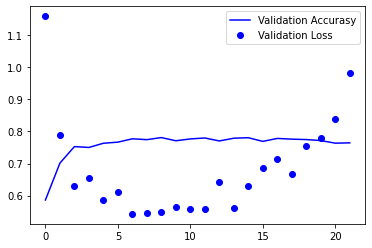

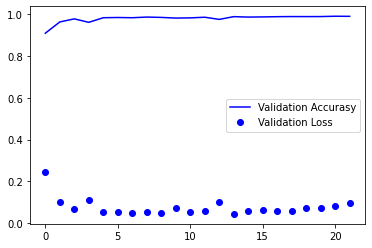

In [ ]:
import matplotlib.pyplot as plt

x = range(len(histoty.history['val_classificator_acc']))

plt.plot(x, histoty.history['val_classificator_acc'], 'b',label="Validation Accurasy")
plt.plot(x, histoty.history['val_classificator_loss'], 'bo',label="Validation Loss")
plt.legend()

plt.figure()
plt.plot(x, histoty.history['val_FOT_acc'], 'b',label="Validation Accurasy")
plt.plot(x, histoty.history['val_FOT_loss'], 'bo',label="Validation Loss")
plt.legend()


plt.show()

In [ ]:
model.save_weights('weights.h5')

#Sklearn

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier

text_clf = Pipeline(steps=[
                           ('vect', CountVectorizer()),
                           ('tfidf', TfidfTransformer()),
                           ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=1, max_iter=5, tol=None))
])

text_clf.fit(train_x, train_y['label'])

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                      

In [ ]:
import numpy as np
predicted = text_clf.predict(val_x)
np.mean(predicted == val_y['label'])

0.9760579064587973

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__alpha': (1e-2, 1e-3)
}

gl_clf = GridSearchCV(text_clf, parameters, cv=5)

gl_clf = gl_clf.fit(train_x, train_y['label'])

In [ ]:
gl_clf.best_score_

0.9765577565440797

In [ ]:
for param_name in sorted(parameters.keys()):
  print(f"{param_name}  {gl_clf.best_params_[param_name]}")

clf__alpha  0.001
tfidf__use_idf  True
vect__ngram_range  (1, 1)
